In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

# Checking for Null values

In [7]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# As we can see there are a lot of missing values present in almost every column. We will drop the columns which have more than 30% missing values

In [8]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

# We have dropped the columns which had more than 30% missing values

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,16.990631,21.68339
std,6.398495,7.119049,8.478060,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,40.200000,46.70000


# Checking Skewness 

In [10]:
from scipy.stats import skew

In [11]:
colname=df.select_dtypes('float64').columns

In [12]:
colname

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

MinTemp
nan


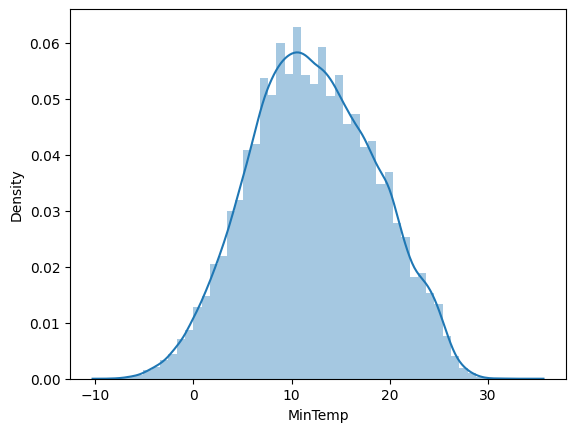

MaxTemp
nan


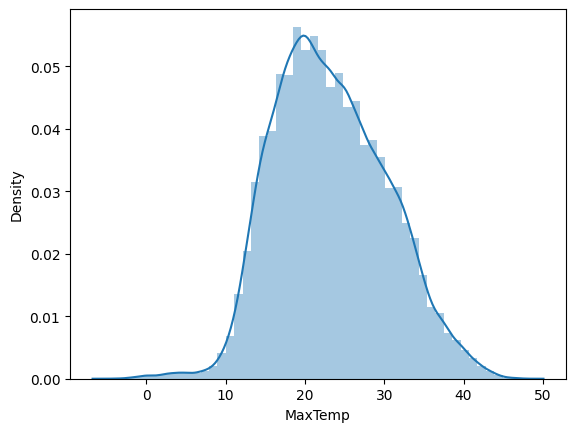

Rainfall
nan


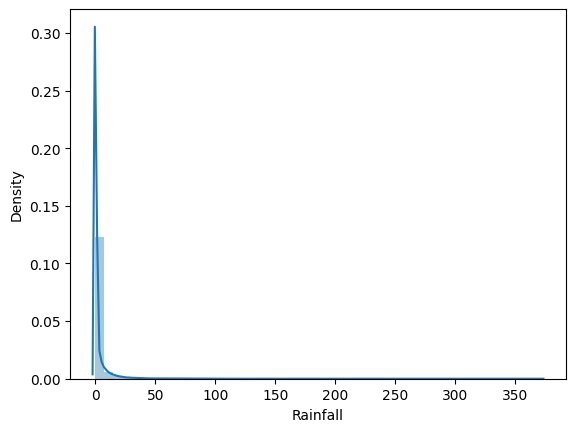

WindGustSpeed
nan


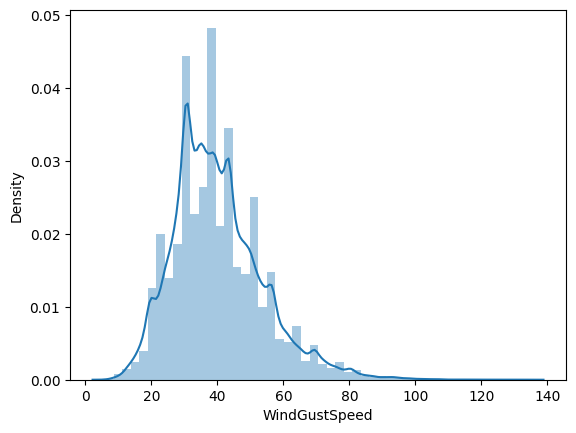

WindSpeed9am
nan


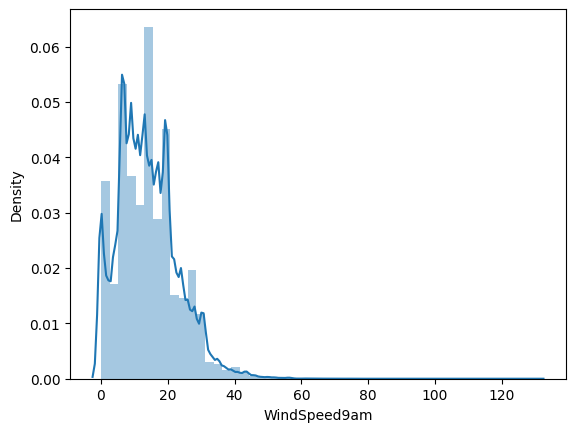

WindSpeed3pm
nan


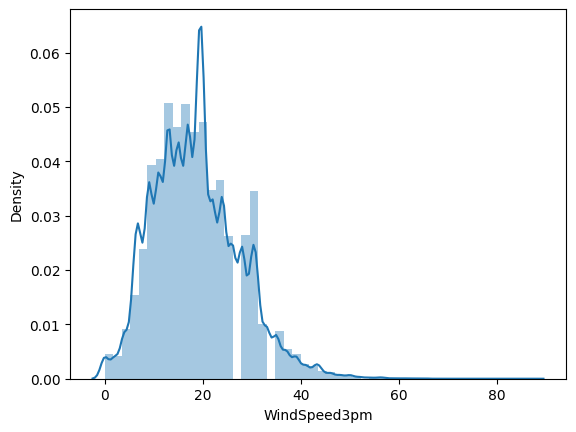

Humidity9am
nan


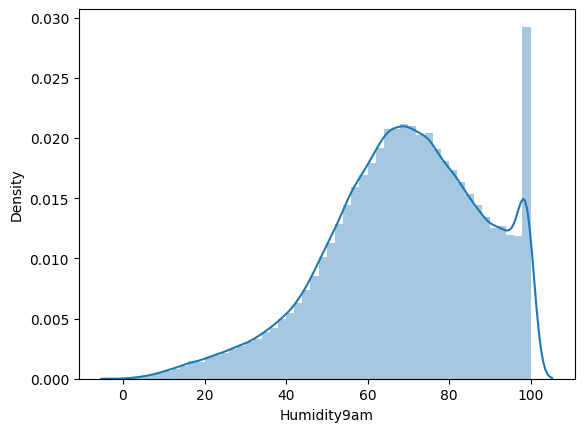

Humidity3pm
nan


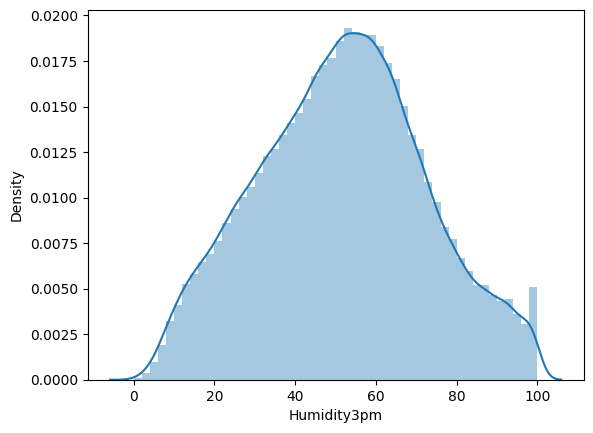

Pressure9am
nan


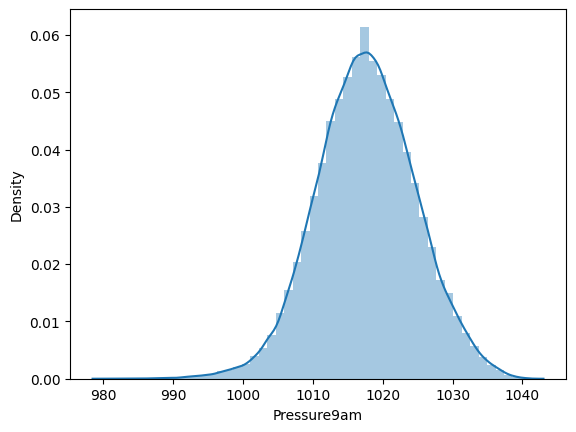

Pressure3pm
nan


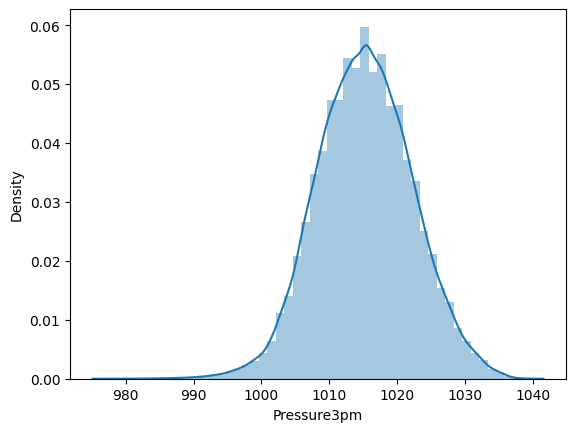

Temp9am
nan


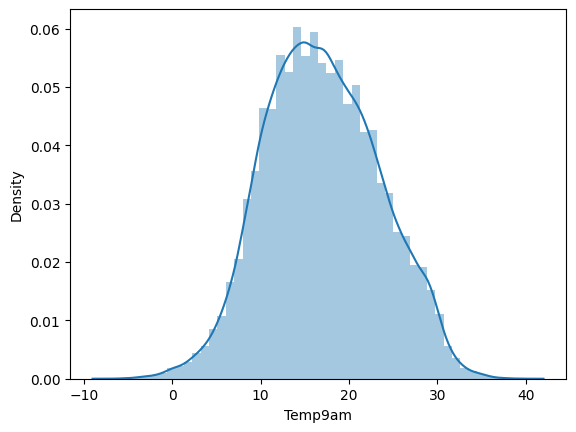

Temp3pm
nan


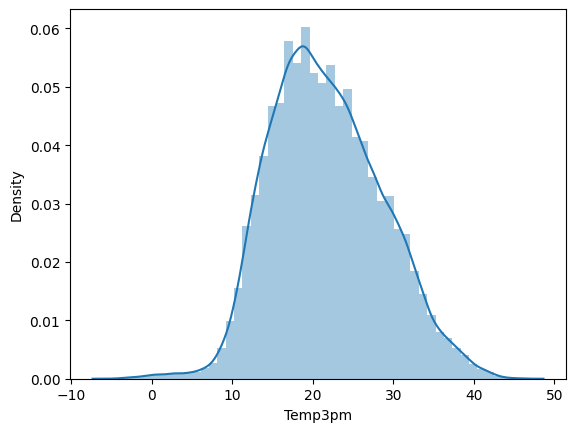

In [13]:
for i in df[colname]:
    print(i)
    print(skew(df[i]))
    sns.distplot(df[i])
    plt.show()

# Fill the missing values in columns which lies between 3% to 30% with Simple Imputer

In [14]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['WindGustSpeed','Pressure9am','Pressure3pm']]=si.fit_transform(df[['WindGustSpeed','Pressure9am','Pressure3pm']])

In [16]:
si1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['WindGustDir','WindDir9am']]=si1.fit_transform(df[['WindGustDir','WindDir9am']])

# As all remaining columns have missins values less than 3% we will drop the missing values using dropna method

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Here all the missing values have been dropped and now no missing values are present in the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       134590 non-null  object 
 1   MinTemp        134590 non-null  float64
 2   MaxTemp        134590 non-null  float64
 3   Rainfall       134590 non-null  float64
 4   WindGustDir    134590 non-null  object 
 5   WindGustSpeed  134590 non-null  float64
 6   WindDir9am     134590 non-null  object 
 7   WindDir3pm     134590 non-null  object 
 8   WindSpeed9am   134590 non-null  float64
 9   WindSpeed3pm   134590 non-null  float64
 10  Humidity9am    134590 non-null  float64
 11  Humidity3pm    134590 non-null  float64
 12  Pressure9am    134590 non-null  float64
 13  Pressure3pm    134590 non-null  float64
 14  Temp9am        134590 non-null  float64
 15  Temp3pm        134590 non-null  float64
 16  RainToday      134590 non-null  object 
 17  RainTomorrow   134590 non-nul

# Converting categorical into numerical data using encoding

In [20]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [22]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]=
oe.fit_transform(df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']])

In [23]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,2.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,2.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,No
4,2.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,No
145455,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,No
145456,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,No
145457,41.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,No


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [25]:
df['RainTomorrow'].unique()

array([0, 1])

In [26]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,2.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,2.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,2.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0
145455,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0
145456,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0
145457,41.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0


# Splitting the dataset

In [27]:
x=df.iloc[:,0:-1].values
x

array([[ 2. , 13.4, 22.9, ..., 16.9, 21.8,  0. ],
       [ 2. ,  7.4, 25.1, ..., 17.2, 24.3,  0. ],
       [ 2. , 12.9, 25.7, ..., 21. , 23.2,  0. ],
       ...,
       [41. ,  3.6, 25.3, ..., 10.9, 24.5,  0. ],
       [41. ,  5.4, 26.9, ..., 12.5, 26.1,  0. ],
       [41. ,  7.8, 27. , ..., 15.1, 26. ,  0. ]])

In [28]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
x

array([[-1.5337994 ,  0.18986408, -0.05108984, ..., -0.01212636,
         0.00729032, -0.5340412 ],
       [-1.5337994 , -0.75122871,  0.2604199 , ...,  0.03423448,
         0.36840422, -0.5340412 ],
       [-1.5337994 ,  0.11143968,  0.3453771 , ...,  0.6214718 ,
         0.2095141 , -0.5340412 ],
       ...,
       [ 1.19646447, -1.34725415,  0.28873897, ..., -0.93934318,
         0.39729333, -0.5340412 ],
       [ 1.19646447, -1.06492631,  0.5152915 , ..., -0.69208536,
         0.62840622, -0.5340412 ],
       [ 1.19646447, -0.68848919,  0.52945103, ..., -0.29029141,
         0.61396167, -0.5340412 ]])

# Splitting the dataset into training and testing dataset

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Building the model

In [32]:
ann=Sequential()

# Adding hidden layers to the model

In [33]:
ann.add(Dense(150,activation='relu'))
ann.add(Dropout(rate=0.2))

ann.add(Dense(150,activation='relu'))
ann.add(Dropout(rate=0.2))

ann.add(Dense(1,activation='sigmoid'))

# Establishing the connection between the layers

In [34]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Importing earlystopping library 

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',patience=25)

# Training the model

In [36]:
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=300,batch_size=100,verbose=1,
        callbacks=[es])

Epoch 1/300
1077/1077 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8437 - val_loss: 0.3456 - val_accuracy: 0.8523
Epoch 2/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3515 - accuracy: 0.8502 - val_loss: 0.3389 - val_accuracy: 0.8537
Epoch 3/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3484 - accuracy: 0.8513 - val_loss: 0.3380 - val_accuracy: 0.8566
Epoch 4/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3452 - accuracy: 0.8522 - val_loss: 0.3347 - val_accuracy: 0.8568
Epoch 5/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3438 - accuracy: 0.8532 - val_loss: 0.3358 - val_accuracy: 0.8571
Epoch 6/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3415 - accuracy: 0.8543 - val_loss: 0.3329 - val_accuracy: 0.8573
Epoch 7/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3400 - accuracy: 0.8550 - val_loss: 0.3305 - val_ac

1077/1077 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8660 - val_loss: 0.3264 - val_accuracy: 0.8596
Epoch 58/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3157 - accuracy: 0.8665 - val_loss: 0.3267 - val_accuracy: 0.8598
Epoch 59/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3157 - accuracy: 0.8659 - val_loss: 0.3274 - val_accuracy: 0.8613
Epoch 60/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3147 - accuracy: 0.8662 - val_loss: 0.3276 - val_accuracy: 0.8608
Epoch 61/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3148 - accuracy: 0.8660 - val_loss: 0.3277 - val_accuracy: 0.8608
Epoch 62/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3154 - accuracy: 0.8662 - val_loss: 0.3257 - val_accuracy: 0.8614
Epoch 63/300
1077/1077 [==============================] - 2s 2ms/step - loss: 0.3148 - accuracy: 0.8661 - val_loss: 0.3259 - val_accuracy

In [37]:
ann.history.history

{'loss': [0.36581382155418396,
  0.35145893692970276,
  0.3484371304512024,
  0.34516191482543945,
  0.3438326120376587,
  0.3414609432220459,
  0.3399929702281952,
  0.33912554383277893,
  0.3377738893032074,
  0.33634814620018005,
  0.33550792932510376,
  0.33499667048454285,
  0.3338972330093384,
  0.33372700214385986,
  0.3319515883922577,
  0.33218905329704285,
  0.3314156234264374,
  0.33066272735595703,
  0.3297240138053894,
  0.32915276288986206,
  0.3289799988269806,
  0.32835566997528076,
  0.32770320773124695,
  0.3281016945838928,
  0.32644808292388916,
  0.326649934053421,
  0.3261687159538269,
  0.3252173066139221,
  0.3256732225418091,
  0.3242429494857788,
  0.32441091537475586,
  0.3236311376094818,
  0.32341593503952026,
  0.3220312297344208,
  0.3234211206436157,
  0.32294338941574097,
  0.32248446345329285,
  0.32091379165649414,
  0.32162579894065857,
  0.320749968290329,
  0.32110440731048584,
  0.3208119571208954,
  0.3201605975627899,
  0.32038143277168274,
  0.

# Making Predictions

In [39]:
ypred=ann.predict(xtest)

842/842 [==============================] - 0s 526us/step


In [40]:
ypred

array([[0.01425193],
       [0.03892713],
       [0.11097739],
       ...,
       [0.1671862 ],
       [0.31435546],
       [0.00717696]], dtype=float32)

In [41]:
ypred=np.where(ypred>0.5,1,0)
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Checking Accuracy

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     21043
           1       0.75      0.54      0.63      5875

    accuracy                           0.86     26918
   macro avg       0.82      0.74      0.77     26918
weighted avg       0.85      0.86      0.85     26918

